# WikiPathway service from BioServices

In [1]:
from bioservices import *
%pylab inline
# let us define the dpi 
matplotlib.rcParams['savefig.dpi'] = 400 

Populating the interactive namespace from numpy and matplotlib


In [2]:
s = WikiPathways()
# Note that by default, organism is human:
s.organism

INFO:root:Initialising WikiPathways service (WSDL)
INFO:root:Fetching organisms...


'Homo sapiens'

Let us find the pathways that contains MTOR and let us play with the first one [0]. 

In [3]:
res = s.findPathwaysByText("BRAF")

In [4]:
ids = [this['id'] for this in res if this['species'] in ['Homo sapiens', '']]
print(ids)

[WP734, WP2253, WP422, WP722, WP2735, WP1873, WP2571, WP2828, WP2512, WP185, WP615, WP2261, WP382, WP306, WP51, WP2032, WP23, WP1984, WP3334, WP3336, WP437, WP2355, WP3338, WP3335, WP2754]


In [5]:
im = s.getColoredPathway("WP734")

In [6]:
from IPython.display import SVG

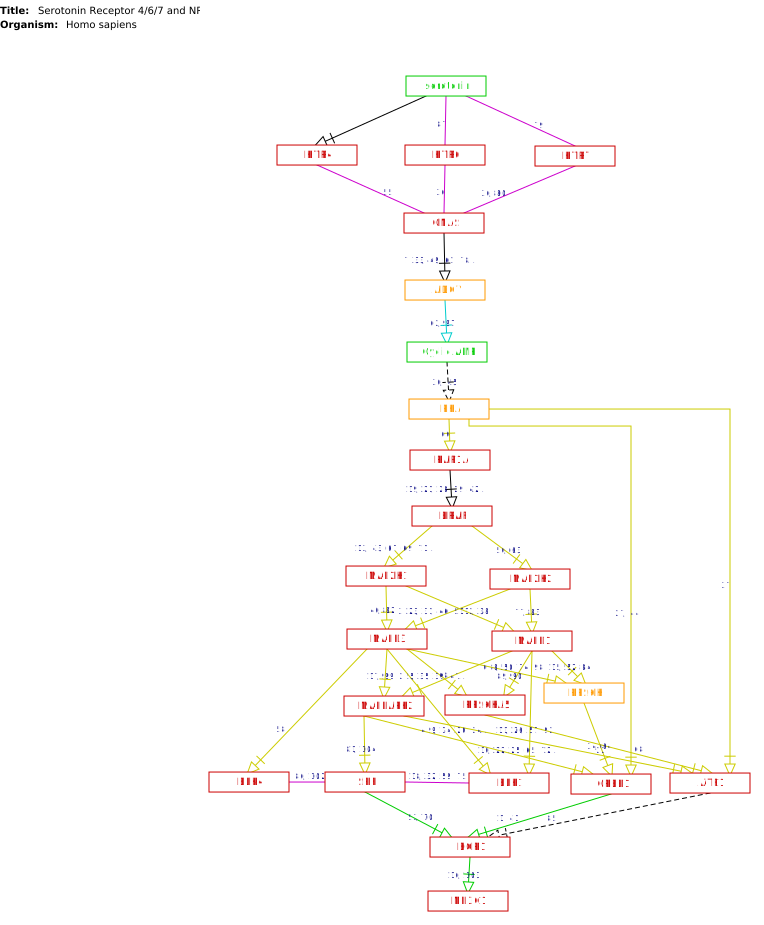

In [7]:
SVG(im)

Let us find all interactions related to MTOR and plot the interaction graph


In [8]:
interactions = s.findInteractions("SMAD2")

In [9]:
for inter in interactions:
    print(inter)

([TGFB1], [SMAD2])
([], [SMAD2])
([TGIF1], [SMAD2])
([TGFBR1], [SMAD2])
([SMAD4], [SMAD2])
([SMAD1], [SMAD2])
([ACVR1], [SMAD2])
([KLF4], [SMAD2])
([NODAL], [SMAD2])
([FOXH1], [SMAD2])
([YAP1], [SMAD2])
([ACVR2B], [SMAD2])
([SMAD3], [SMAD2])
([RAB38], [SMAD2])
([APC], [SMAD2])
([MAP2K3], [SMAD2])
([NODAL], [SMAD2])
([SMAD3], [SMAD2])
([GATA4], [SMAD2])
([TGFB1], [SMAD2])
([SMAD4], [SMAD2])
([SMAD2], [SMAD7])
([SMAD2], [SMAD6])
([SMAD2], [SMAD4])
([SMAD2], [SMAD4])
([SMAD2], [SMAD1])
([SMAD2], [NANOG])
([SMAD2], [LEF1])
([SMAD2], [PRKAR1A])
([SMAD2], [NODAL])
([SMAD2], [EPB41L5])
([SMAD2], [SMAD3])
([SMAD2], [FOXH1])
([SMAD2], [YAP1])
([SMAD2], [FOXH1])
([SMAD2], [CTNNB1])
([SMAD2], [NANOG])
([SMAD2], [BPTF])
([SMAD2], [NODAL])
([SMAD2], [EPB41L5])
([SMAD2], [DAB2])
([SMAD2], [SMAD4])
([SMAD2], [MAX])
([SMAD2], [ZMIZ1])
([SMAD2], [CIP1])
([SMAD2], [JKIP1])
([SMAD2], [UBP15])
([TGFBR2, TGFBR1, TGFBR3], [SMAD3, None, SMAD2, SMAD4])
([SMAD3, None, SMAD2, SMAD4], [])
([TGFBR1, TGFBR2, None]

In [11]:
from cno import *
c = CNOGraph()

In [12]:
for interaction in interactions:
    inputs, outputs = interaction
    if isinstance(inputs, str):
        inputs = [inputs]
    if isinstance(outputs, str):
        outputs = [outputs]
        
    for n1 in inputs:
        for n2 in outputs:
            if n1 and n2 and n1!=n2:
                c.add_edge(n1, n2, link="+")
        

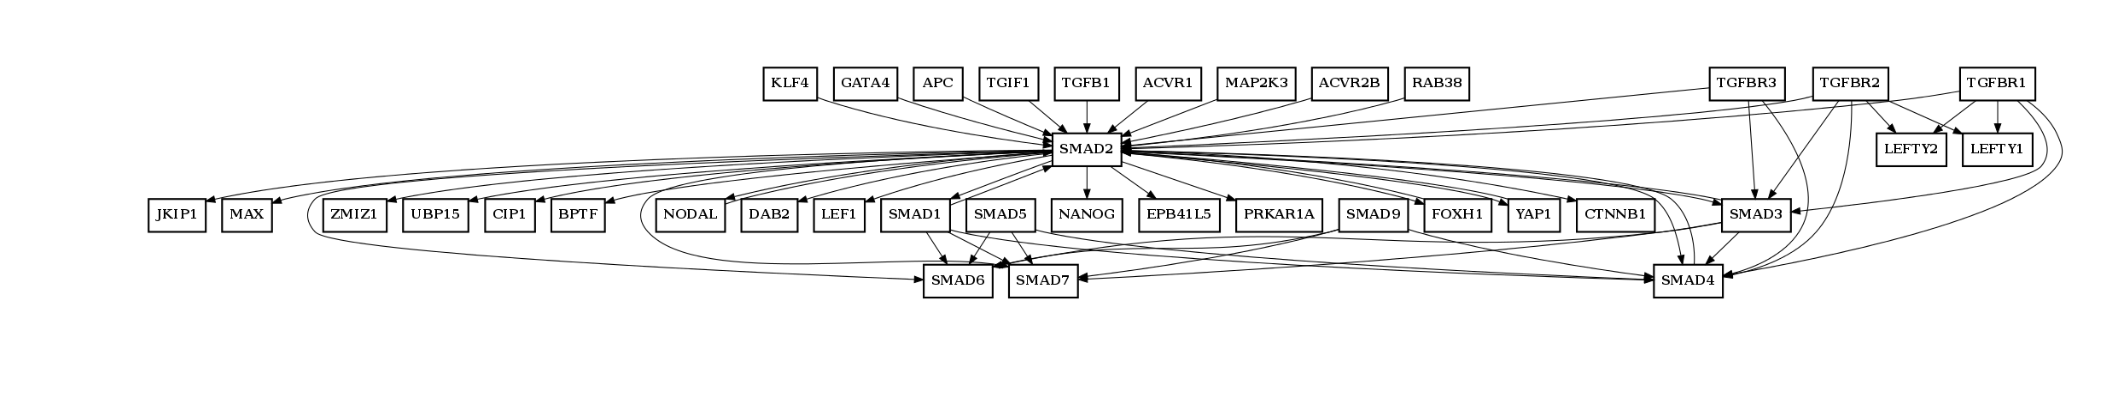

In [14]:
c.graph_options['graph']['dpi'] = 150
c.plot()
